**Laboratorio 4 - Regresión lineal polinómica**<br>
Jose Jorge Pérez 18364<br>
Diego Ruiz 18761

Antes de empezar a trabajar, importamos las librerias de numpy, pandas y sklearn para podeer leer, guardar y realizar operaciones sobre nuestro archivo CSV.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split

**Task 1.1**<br>
Leer el archivo CSV proporcionado y almacenarlo en un p.array para ser trabajado en el notebook. <br><br>
Usamos pandas para leer y numpy para almacenar

In [15]:
data = pd.read_csv('kc_house_data.csv')
dataN = data.to_numpy()

**Task 1.2**<br>
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living). <br><br>
Usamos pandas para leer y numpy para almacenar

Primero, extraemos los datos de las columnas 'price' y 'sqft_living' ya que son las que nos interesan diagramar.<br>
Luego, dividimos la data entre sets de entrenamiento y testing para adecuar nuestra data a datos desconocidos.<br>
Luego, definimos los grados de polinomio que queremos probar, en nuestro caso, 10 fue el máximo que parecía razonable.

In [16]:
price = np.array(data['price'])
sqft_living = np.array(data['sqft_living'])

# Dividir la data
sqft_living_train, sqft_living_test, price_train, price_test = train_test_split(sqft_living, price, test_size=0.2, random_state=42)

# Rango de grados de polinomios del 1 al 10
degrees = np.arange(1, 11)

**Task 1.3**<br>
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase). <br><br>
Se realizará para cada grado de polinomio y a su vez, se tomarán scores para calcular el ajuste a iteraciones futuras (cross validation) y para el error que genera el grado de polinomio a los datos actuales. Creamos una lista mse_scores y cv_scores para esto.

In [17]:
mse_scores = []
cv_scores = []

Luego, usamos parte de la data para entrenar y otra para testear.<br>
Esto lo hacemos para cada grado de polinomio razonable que definimos anteriormente.<br>
Por último en el loop, calculamos el error cuadrático medio y el score de cross validation.

In [18]:
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(sqft_living_train.reshape(-1, 1))
    X_test = poly.transform(sqft_living_test.reshape(-1, 1))
    model = LinearRegression()
    
    #error cuadratico medio
    model.fit(X_train, price_train)
    y_pred = model.predict(X_test)
    mse_score = np.mean((y_pred - price_test)**2)
    mse_scores.append(mse_score)
    
    #score cross validation 
    cv_score = -np.mean(cross_val_score(model, X_train, price_train, cv=5, scoring='neg_mean_squared_error'))
    cv_scores.append(cv_score)

**Task 1.4**<br>
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados). <br><br>
Utilizaremos K-Fold para realizar la validación cruzada.<br>
Debemos hallar el grado que tenga el error más bajo y el score cv más alto.

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_degree_idx = np.argmin(mse_scores + cv_scores)
if best_degree_idx < len(mse_scores):
    best_degree = degrees[best_degree_idx]
else:
    best_degree = degrees[best_degree_idx - len(mse_scores)]

Construimos la regresión para el grado de polinomio que mejor se ajusta.<br>
Y por último, dibujamos la curva. 

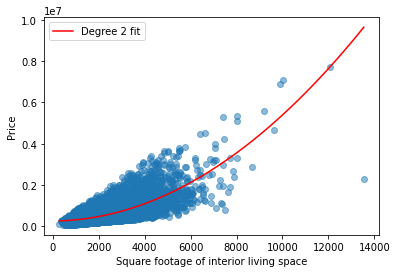

In [21]:
poly = PolynomialFeatures(degree=best_degree)
X_train = poly.fit_transform(sqft_living_train.reshape(-1, 1))
X_test = poly.transform(sqft_living_test.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train, price_train)

x_grid = np.linspace(np.min(sqft_living), np.max(sqft_living), 100).reshape(-1, 1)
X_grid = poly.transform(x_grid)
y_grid = model.predict(X_grid)

plt.scatter(sqft_living, price, alpha=0.5)
plt.plot(x_grid, y_grid, color='red', label=f'Degree {best_degree} fit')
plt.xlabel('Square footage of interior living space')
plt.ylabel('Price')
plt.legend()
plt.show()

**Task 1.5**<br>
Haga un análisis sobre sus hallazgos. <br><br>
Primero, analizando la data llegamos a la conclusión, que como regla general, a medida que incrementa el espacio de vivienda, es decir, los pies cuadrados de interior de una casa, su precio incrementa exponencialmente. A pesar de esto, existian datos atípicos, como el caso de la casa más grande del set de datos, que costaba el 25% que la más cara. Este dato también es interesante ya que previo a implementar la validación cruzada, la gráfica que obteníamos era de grado 6, y practicamente incrementaba y luego bajaba solo para poder pasar por ese dato. Tras implementar un sistema que no solo toma en cuenta el error y que unicamente se preocupa por ajustarse a los datos existentes, se logró diferenciar con mayor claridad la dispersión de datos y obviamente, los datos atípicos. <br>
Esto ejemplifica de sobremanera lo que discutiamos en clase sobre el overfitting, un software para predicción de datos que se basa unicamente en los datos actuales en muchos casos pierde la capacidad de hacer la acción para la cual fue diseñado, predecir. Por otro lado, si únicamente nos basamos en los datos que podrían predecir nuevos datos, perdemos exactitud, por lo que lo más beneficioso es un balance entre ambas cosas. En este caso, nos simplifica una relación de grado 6 a una de grado 2, lo cual simplifica mucho poder sacar conclusiones del diagrama y de la relación entre ambas variables sobre nuestro set de datos.<br>
